# Characters Segmentation

### imports

In [1]:
import cv2
import numpy as np
# from matplotlib import pyplot as plt
import random
import json
from mylib import *

### main variables

In [2]:
image_path = '../images/03.png'
walsh_path = '../res/walsh.json'
white = 0
black = 1
thresh = 100
blue=(255,255,0)
green=(0,255,0)
red=(0,255,255)
violet=(155,205,155)

### Read Image

In [3]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'GrayScale', invert=False)

<Figure size 1628.75x513.75 with 1 Axes>

## Convert to Black and White

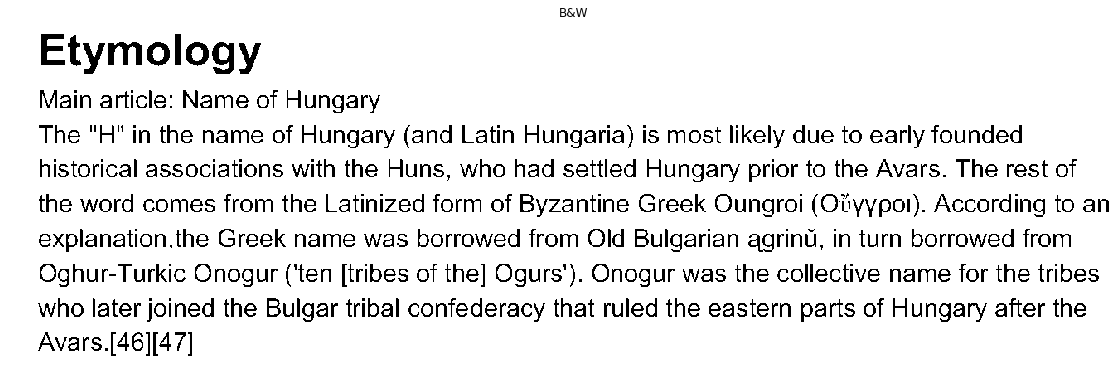

In [4]:
bw=1-gray_to_bw(gray, thresh)//255
plotimage(bw, 'B&W', figsize=(15,15))

### Vertical Segmentation

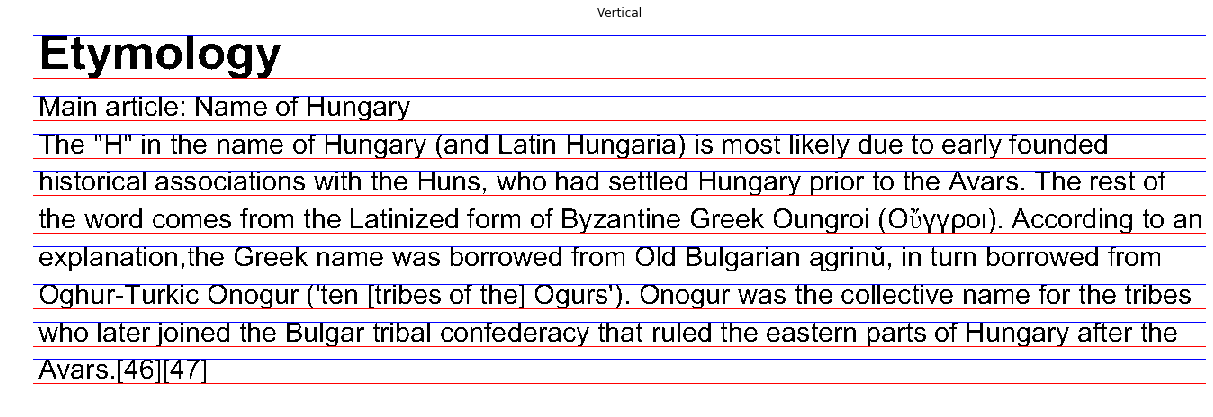

In [5]:
lines = vert_seg(bw)
vert = 255*bw.copy()
vert = cv2.cvtColor(vert, cv2.COLOR_GRAY2RGB)
draw_vert_lines(vert, lines)
plotimage(vert, 'Vertical')

### Horizontal Segmentation

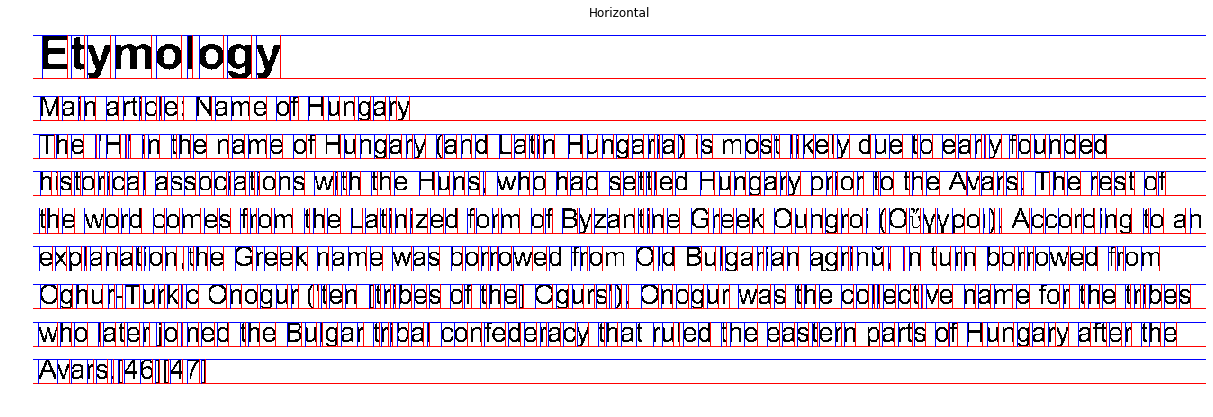

In [19]:
i = 0
start = 0

for line in lines:
    img = bw[line['start']:line['end'],:]
    line['chars'] = hor_seg(img)

hor = vert.copy()
for line in lines:
    start = line['start']
    end = line['end']
    draw_hor_lines(hor, line['chars'], start, end)

plotimage(hor, 'Horizontal')

## Plotting Some Random chars

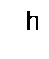

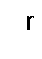

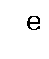

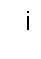

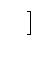

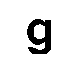

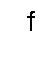

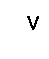

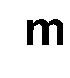

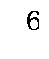

In [20]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = bw[line['start']:line['end'],char['start']:char['end']]
    
    plotimage(img,'')

### Vertical Segmentation for every Char

In [21]:
for line in lines:
    for char in line['chars']:
        img = bw[line['start']:line['end'],char['start']:char['end']]
        char['vertical_parts'] = vert_seg(img)

[{'start': 6, 'end': 21}]


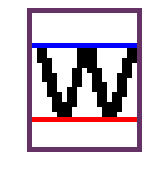

[{'start': 0, 'end': 7}]


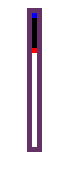

[{'start': 1, 'end': 21}]


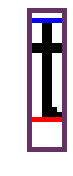

[{'start': 6, 'end': 21}]


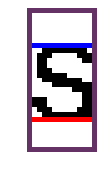

[{'start': 6, 'end': 21}]


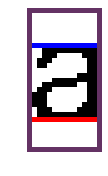

[{'start': 0, 'end': 21}]


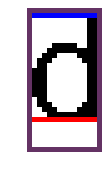

[{'start': 6, 'end': 21}]


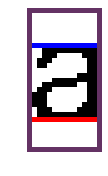

[{'start': 6, 'end': 21}]


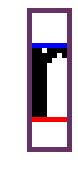

[{'start': 19, 'end': 21}]


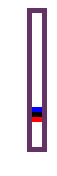

[{'start': 1, 'end': 22}]


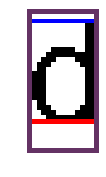

In [22]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = 255*bw[line['start']:line['end'],char['start']:char['end']]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) 
    
    draw_vert_lines(img, char['vertical_parts'])
            
    img = draw_borders(img, color=violet)
#     img = draw_borders(img, color=0)
    print(char['vertical_parts'])
    plotimage(img,'', (2,2))

## Walsh-Functions

### Read walsh functions

In [23]:
with open(walsh_path) as f:
    s = f.read()
walsh_list = json.loads(s)
walsh = []
for l in walsh_list:
    walsh.append(np.array(l))

### Calculcate Walsh Vectors

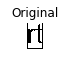

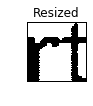

Walsh= [2703, 4061, 4543, 4629, 4271, 4357, 3867, 3953, 4015, 4241, 4331, 4245, 4051, 3965, 4195, 4109, 3225, 4503, 4101, 4187, 3909, 3995, 4213, 4299, 4037, 4343, 4229, 4143, 4029, 3943, 4233, 4147, 4333, 4139, 4153, 4207, 4117, 4171, 3989, 4043, 3513, 4171, 4153, 4099, 4141, 4087, 4137, 4083, 4259, 4145, 4147, 4201, 4135, 4189, 3987, 4041, 3619, 4197, 4127, 4073, 4107, 4053, 4155, 4101]


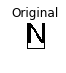

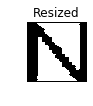

Walsh= [2329, 4149, 4213, 4133, 4169, 4097, 4189, 4113, 3925, 3565, 4121, 4117, 4129, 4253, 4101, 4093, 3201, 4149, 3677, 4133, 4089, 4097, 4013, 4113, 3881, 4257, 4165, 3761, 4085, 3993, 4145, 4097, 3477, 4045, 4381, 4105, 3801, 4077, 4217, 4105, 4189, 4345, 4077, 4301, 4093, 3901, 4077, 4137, 3481, 4089, 4057, 4061, 4309, 4121, 3949, 4061, 4189, 4169, 4077, 4157, 4093, 4229, 4077, 4049]


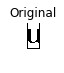

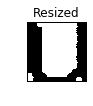

Walsh= [2300, 4302, 3932, 4302, 3998, 4240, 4006, 4240, 3874, 4020, 4210, 4020, 4160, 4082, 4152, 4082, 2652, 3950, 4284, 3950, 4318, 3920, 4326, 3920, 3874, 4020, 4210, 4020, 4160, 4082, 4152, 4082, 3840, 3894, 4256, 3894, 4170, 3976, 4162, 3976, 4398, 4092, 4062, 4092, 4092, 4050, 4100, 4050, 3744, 3990, 4160, 3990, 4106, 4040, 4098, 4040, 4398, 4092, 4062, 4092, 4092, 4050, 4100, 4050]


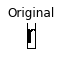

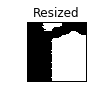

Walsh= [2050, 3738, 3754, 3758, 4096, 4092, 4072, 4072, 2792, 4480, 4488, 4492, 4302, 4298, 4286, 4286, 3738, 4098, 4082, 4078, 3940, 3944, 3964, 3964, 3708, 4068, 4060, 4056, 4046, 4050, 4062, 4062, 4320, 3960, 3976, 3980, 4182, 4178, 4158, 4158, 4390, 4030, 4038, 4042, 4036, 4032, 4020, 4020, 3820, 4180, 4164, 4160, 4062, 4066, 4086, 4086, 3854, 4214, 4206, 4202, 4104, 4108, 4120, 4120]


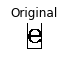

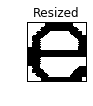

Walsh= [2174, 4200, 4012, 3950, 3506, 4348, 4320, 3962, 4068, 4182, 4346, 3972, 4220, 3990, 4130, 4172, 3674, 4232, 4484, 4490, 4658, 4136, 4452, 4266, 4160, 4150, 4434, 3936, 4156, 3906, 4070, 4092, 4226, 4076, 4444, 4174, 4094, 3912, 4096, 3994, 4324, 4126, 4118, 3864, 3924, 4006, 3998, 4096, 4070, 4108, 4292, 4210, 4158, 4060, 4156, 4138, 4232, 4158, 4030, 3900, 3988, 4090, 4058, 4176]


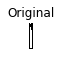

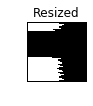

Walsh= [1248, 3458, 4592, 4210, 4156, 4526, 4540, 4142, 5124, 3586, 4500, 4210, 4144, 4446, 4432, 4158, 4000, 4158, 4048, 4110, 4100, 4050, 4036, 4114, 4220, 4030, 4140, 4110, 4112, 4130, 4144, 4098, 4192, 4034, 4144, 4082, 4092, 4142, 4156, 4078, 3972, 4162, 4052, 4082, 4080, 4062, 4048, 4094, 4000, 4158, 4048, 4110, 4100, 4050, 4036, 4114, 4220, 4030, 4140, 4110, 4112, 4130, 4144, 4098]


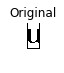

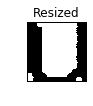

Walsh= [2300, 4302, 3932, 4302, 3998, 4240, 4006, 4240, 3874, 4020, 4210, 4020, 4160, 4082, 4152, 4082, 2652, 3950, 4284, 3950, 4318, 3920, 4326, 3920, 3874, 4020, 4210, 4020, 4160, 4082, 4152, 4082, 3840, 3894, 4256, 3894, 4170, 3976, 4162, 3976, 4398, 4092, 4062, 4092, 4092, 4050, 4100, 4050, 3744, 3990, 4160, 3990, 4106, 4040, 4098, 4040, 4398, 4092, 4062, 4092, 4092, 4050, 4100, 4050]


In [25]:
c = 7 #samples to plot

for line in lines:
    for char in line['chars']:
        start=line['start']
        end=line['end']
        
        if char['vertical_parts'] and len(char['vertical_parts'])>0:
            start=line['start']+char['vertical_parts'][0]['start']
            end=line['start']+char['vertical_parts'][-1]['end']
                    
        img = bw[start:end,char['start']:char['end']]
        img = img.copy()
        img = cv2.resize(img, (64,64))
        v = []
        for w in walsh:
            v.append(inner_prod(img, w))
        char['walsh_vector'] = v        
        
        if c and np.random.randint(10)==0:
            original_img = bw[line['start']:line['end'],char['start']:char['end']]
            plotimage(draw_borders(original_img,black),title='Original')
            plotimage(draw_borders(img,black), title='Resized')
            print("Walsh=", v)
            c-=1
        

### Vector Comparison

In [26]:
v1 = lines[1]['chars'][4]['walsh_vector']
v2 = lines[2]['chars'][5]['walsh_vector']

distance(v1, v2)

1061649344

### Save result in a json file

In [27]:
s = json.dumps({"image_path": image_path, "threshold": thresh, "lines":lines}, indent=2)
with open(image_path+'.lines.json', 'w') as f:
    f.write(s)